In [ ]:
# Mount Google drive so dataset can be accessed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Project Description: Twitter US Airline Sentiment**



# Business Case

Let's say you are planning your trip from or to the United States, definitely you need to book your tickets with the best airlines to avoid anything that disturbs your mood during your vacation. Advertisments can be tricky and misleading, so the best way to build your impression on an airline are people's feedback and review, thankfully we have social media that made accessing people's point of views and feedbacks easier than ever.

In this notebook, we are going to anaylyze 15k tweets from people about 6 american airlines, in order to have better intuiton and view about the quality of their services and the positive and negative reviews of their clients. Also, we are going to train machine learning and deep learning models to predict and classify if a given tweet is a negative or a positive review or neither.



# Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to:

* first classify positive, negative, and neutral tweets
* second, categorizing negative reasons (such as "late flight" or "rude service").


# Loading the dataset: Load the data and import the libraries.

In [ ]:
pip install emoji --upgrade

     |████████████████████████████████| 133kB 19.2MB/s 


In [ ]:
# print(os.listdir("../input"))
!pip install contractions


import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import os
import re
import nltk
nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import gensim
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import string
import emoji
from pprint import pprint
import collections

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report #for accuracy and scores
from sklearn.externals import joblib

### Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB #mainly based on bayes theorem; not complicated but has its advantages
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression #The most simple classifier
#ensemble models are worth trying 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier #although it does not need training but still brilliant
from sklearn.svm import SVC #most popular machine learning classifier 
from sklearn.svm import LinearSVC


     |████████████████████████████████| 286kB 29.4MB/s 
     |████████████████████████████████| 327kB 17.5MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85397 sha256=43839d2e6bb79fdba4d68a371d2c695a429e4c82c40c1c9d20865f15f291e8ae
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets.csv')

In [ ]:
print(len(df))

14640




*   146,640 rows of data



In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Understand of data-columns

The first step should be to check the shape of the dataframe and then check the number of null values in each column.

In [ ]:
print("Shape of the dataframe is",df.shape)
print("The number of nulls in each column are \n", df.isna().sum())

Shape of the dataframe is (14640, 15)
The number of nulls in each column are 
 tweet_id                        0    
airline_sentiment               0    
airline_sentiment_confidence    0    
negativereason                  5462 
negativereason_confidence       4118 
airline                         0    
airline_sentiment_gold          14600
name                            0    
negativereason_gold             14608
retweet_count                   0    
text                            0    
tweet_coord                     13621
tweet_created                   0    
tweet_location                  4733 
user_timezone                   4820 
dtype: int64


In [ ]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                        0.00 
airline_sentiment               0.00 
airline_sentiment_confidence    0.00 
negativereason                  37.31
negativereason_confidence       28.13
airline                         0.00 
airline_sentiment_gold          99.73
name                            0.00 
negativereason_gold             99.78
retweet_count                   0.00 
text                            0.00 
tweet_coord                     93.04
tweet_created                   0.00 
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data. 

Under normal circumstances it will be better to delete these columns as they will not provide any constructive information. **(Though the project guidelines already asks for us to delete all columnns except "text" and "airline_sentiment")**

In [ ]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials to the experience... tacky.,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing about it,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Data visualization

Some exploratory analysis and visualization on the data will be done and presented. Pandas and matplotlib are great libraries for data visualization ans statistics We will start by showing the number of negative, positive and neutral reviews from the data we have.

Text(0.5, 1.0, 'Count of Type of Sentiment')

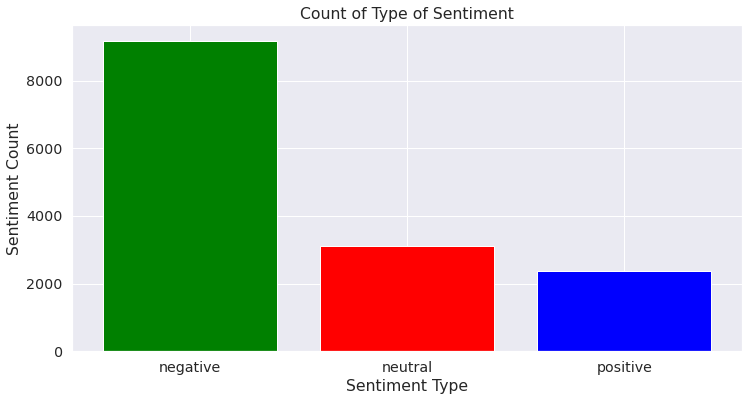

In [ ]:
counter = df.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

Lots of people are not having pleasant flights these days. It is important to know which airline pleases their costumers the most and vice versa, so we sill be looking at the percentage of the negative reviews for each airline.

            Percent Negative
American    0.710402        
Delta       0.429793        
Southwest   0.490083        
US Airways  0.776862        
United      0.688906        
Virgin      0.359127        


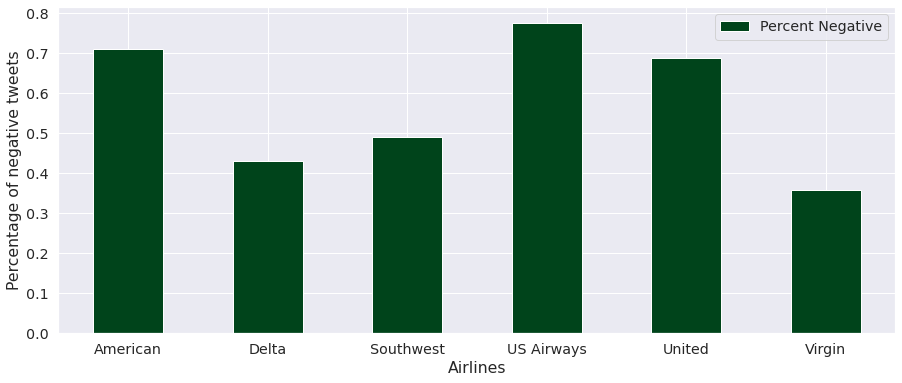

In [ ]:
neg_tweets = df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = df.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

Next time I am flying either with Virgin or Delta airlines, but maybe avoid US Airways if you can?

Looking on the bright side, we will show the numbers of each type of review for each line in the next graph.

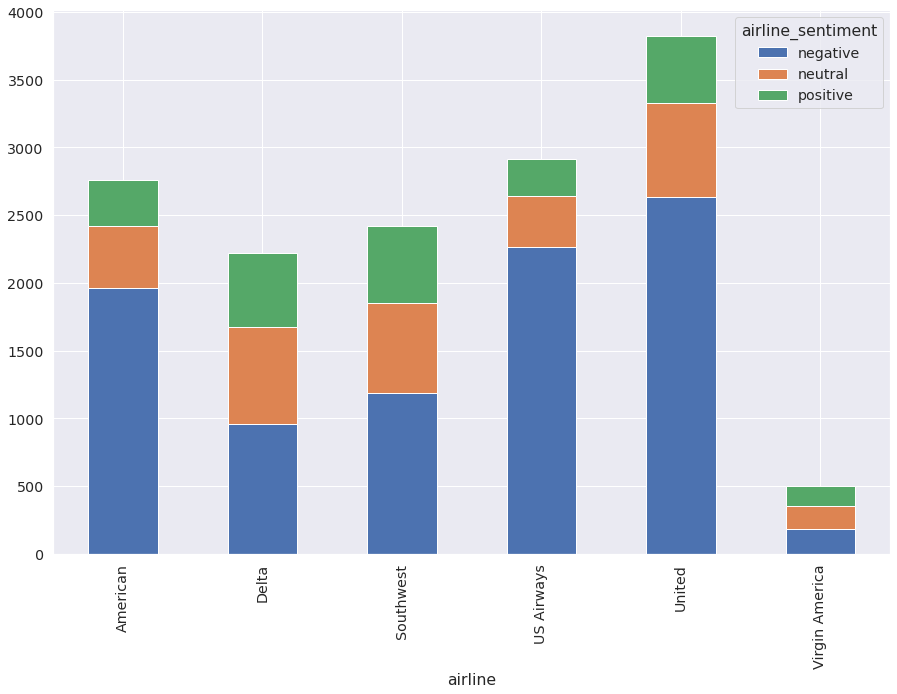

In [ ]:
figure_2 = df.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [ ]:
print(figure_2)

airline         airline_sentiment
American        negative             1960
                neutral              463 
                positive             336 
Delta           negative             955 
                neutral              723 
                positive             544 
Southwest       negative             1186
                neutral              664 
                positive             570 
US Airways      negative             2263
                neutral              381 
                positive             269 
United          negative             2633
                neutral              697 
                positive             492 
Virgin America  negative             181 
                neutral              171 
                positive             152 
dtype: int64


Broken down into 10 reasons why people complain. 

We'll break these down in the following graphs

**Airline sentiments for each airline**

- Lets calculate the total number of tweets for each airline
- Then, we are going to get the barplots for each airline with respect to sentiments of tweets (positive,negative or neutral).
- This will give us a clearer idea about the airline sentiments , airlines relationship.

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America    504 
Name: airline_sentiment, dtype: int64


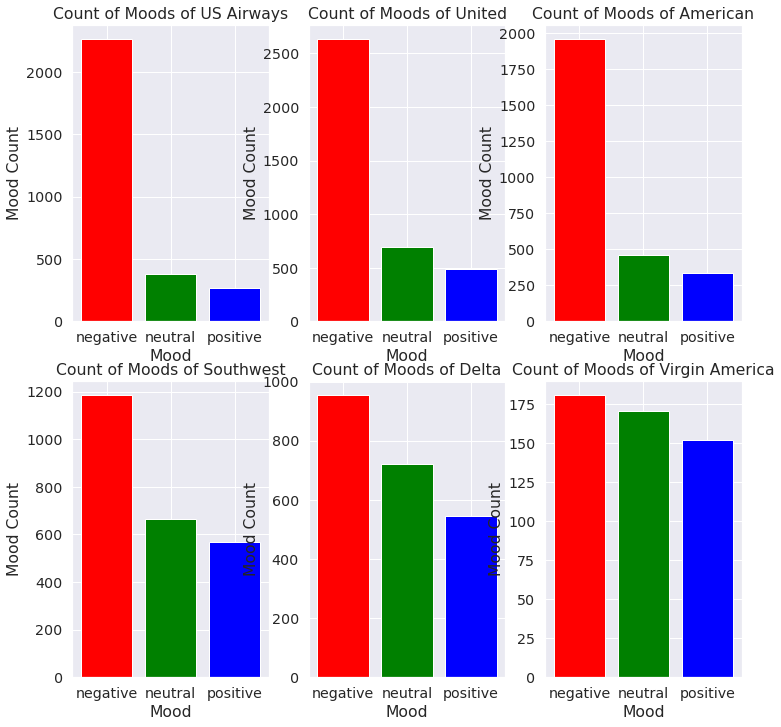

In [ ]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

- United, US Airways, American substantially get negative reactions.
- Tweets for Virgin America are the most balanced.

# Most used words in Positive and Negative tweets

In [ ]:
from wordcloud import WordCloud,STOPWORDS

- The goal is to firstly get an idea of the most frequent words in negative tweets.
- Get idea about most frequent words in positive tweets.

# Wordcloud for Negative sentiments of tweets

Wordcloud is a great tool for visualizing nlp data. The larger the words in the wordcloud image , the more is the frequency of that word in our text data.

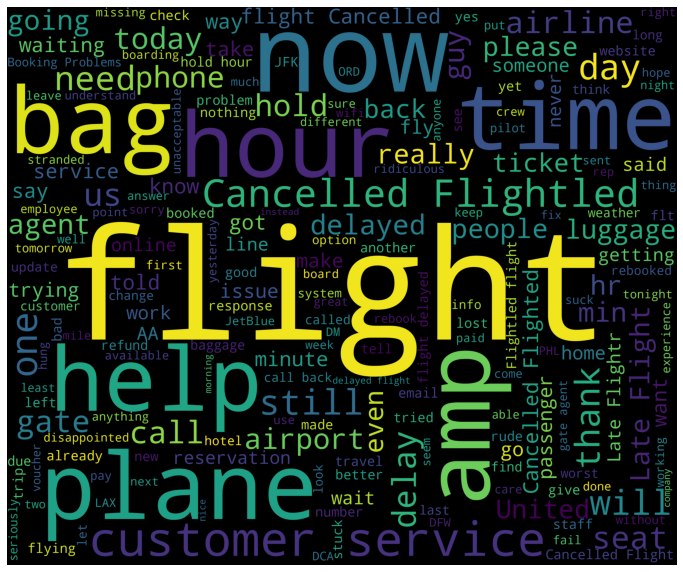

In [ ]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Wordcloud for positive reasons

The code for getting positive sentiments is completely same with the one for negative sentiments. Just replace negative with positive in the first line. Easy, right!

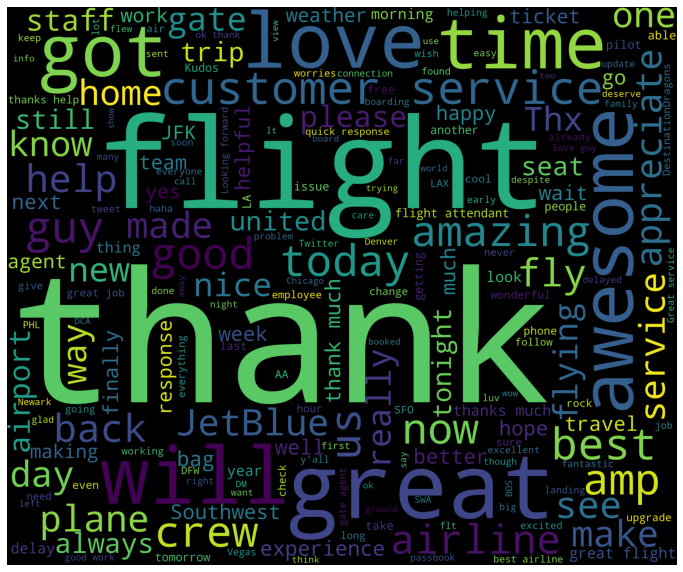

In [ ]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Highest frequency words in postive sentimental tweets

In [ ]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

- Words like Thanks, best, customer , love, flying , good are understandably present in the most frequent words of positive tweets.
- However, other than these, most of the words are stop words and need to be filtered. We will do so later.
- Lets try and visualize the reasons for negative tweets first !!

# What are the reasons for negative sentimental tweets for each airline ?

We will explore the **negative reason** column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers

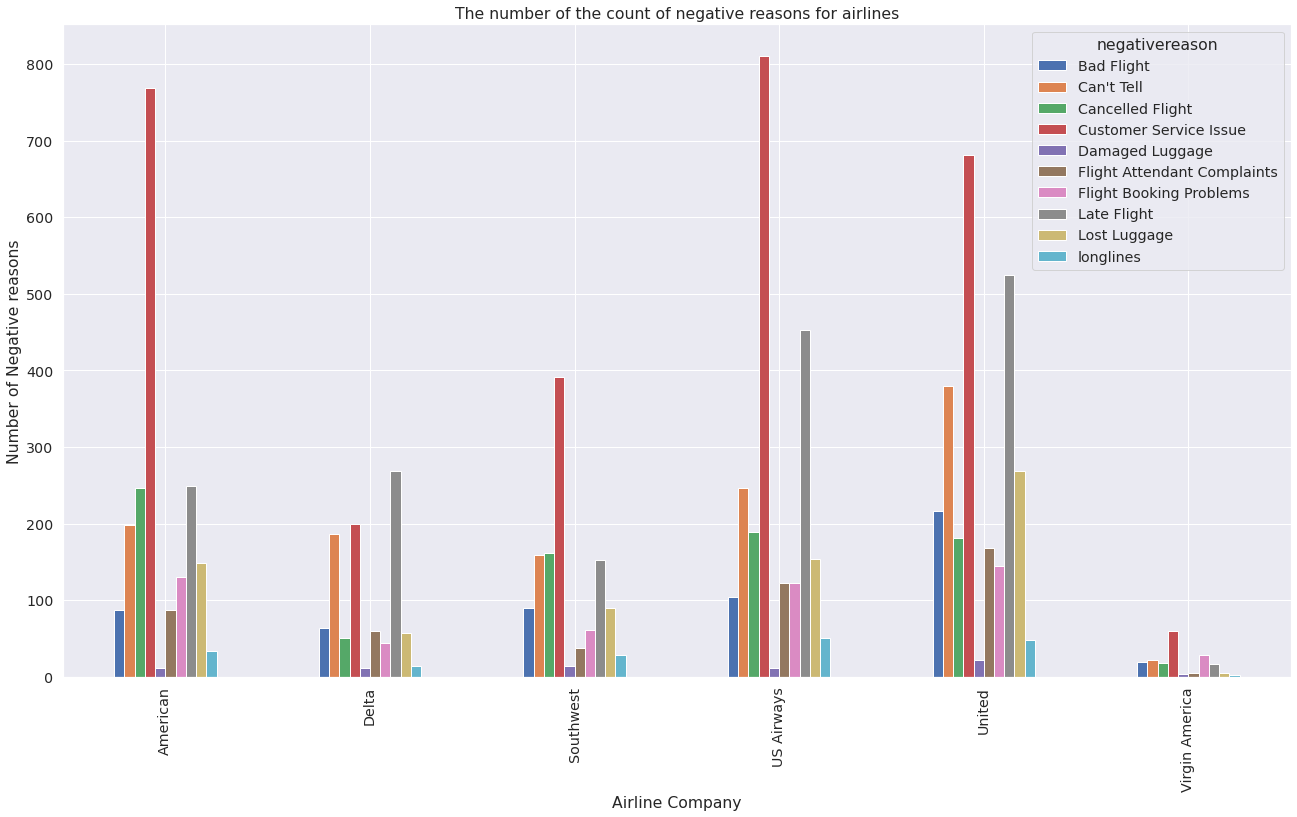

In [ ]:
negative_reasons = df.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

Except for Delta airlines, Costumer service is the leading reason for people's complaints on twitter. US airways should really consider doing a fundemental change in their customer service.

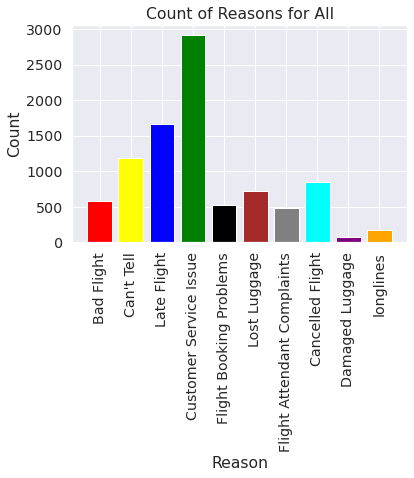

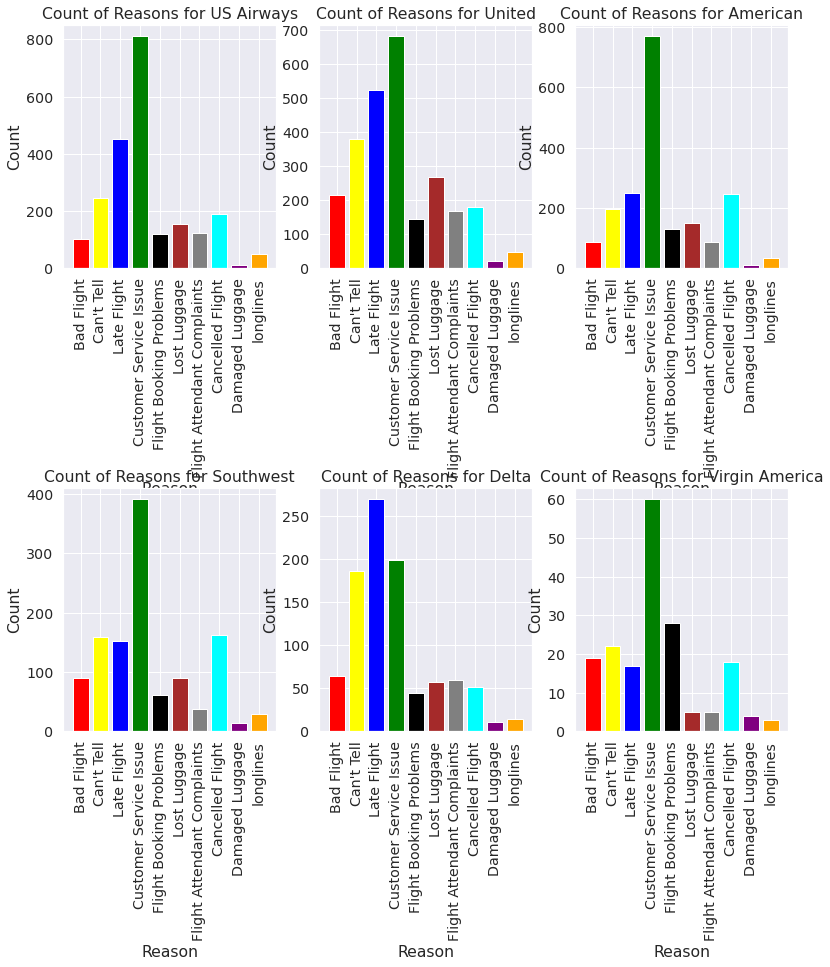

In [ ]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

- Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America
- Late Flight is the main negative reason for Delta
- Interestingly, Virgin America has the least count of negative reasons (all less than 60)
- Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)

# Is there a relationship between negative sentiments and date ?

It will be interesting to see if the date has any effect on the sentiments of the tweets(especially negative !). We can draw various coclusions by visualizing this.


In [ ]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative             1  
                               neutral              1  
               United          negative             2  
2015-02-17     Delta           negative             108
                               neutral              86 
                                                    .. 
2015-02-24     United          neutral              49 
                               positive             25 
               Virgin America  negative             10 
                               neutral              6  
                               positive             13 
Length: 136, dtype: int64

This shows the sentiments of tweets for each date from **2015-02-17** to **2015-02-24** for every airline in our dataframe.

Our next step will be to plot this and get better visualization for negative tweets.

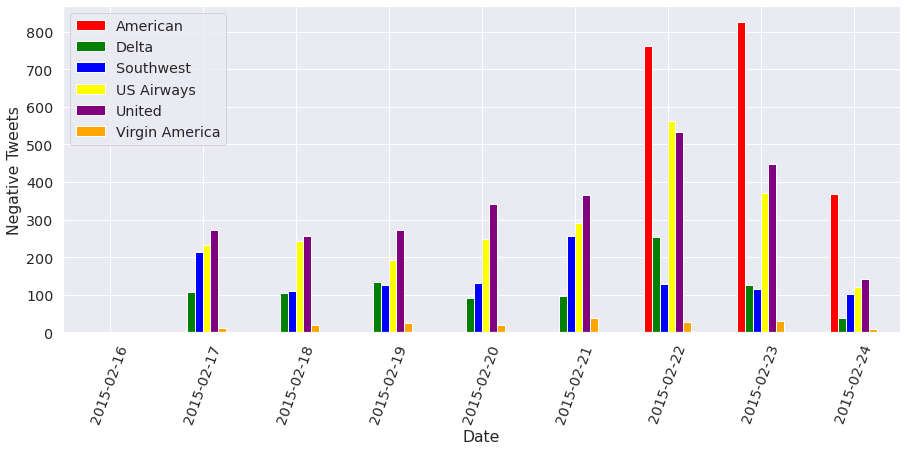

In [ ]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

- Interestingly, **American** has a sudden upsurge in negative sentimental tweets on **2015-02-23**, which reduced to half the very next day **2015-02-24**. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)
- **Virgin America** has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for **Virgin America** was also significantly less as compared to the rest airlines, and hence the least negative tweets.
- The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

# Drop all other columns except “text” and “airline_sentiment”.

After applying the preprocessing on the data we need; the **sentiment** and the tweet itself, we will be splitting our data to training (70%) and testing (30%) after mapping the sentiment to numbers, because again the computers only understand numbers.

In [ ]:
df.head()
df = df.loc[:, ['text', 'airline_sentiment']]

In [ ]:
# https://github.com/Bhavin789/Twitter-Airline-Sentiment-Analysis/blob/master/Air%20Line%20Twitter%20Sentiment%20Analysis.ipynb
# df = df.reindex(np.random.permutation(df.index)) 
# df.drop('index',inplace=True,axis=1)
# df.reset_index(inplace=True)
# df = df[['text', 'airline_sentiment']]
# df.head()

# Check the shape of data.

In [ ]:
print("Shape of the dataframe is",df.shape)
print("The number of nulls in each column are \n", df.isna().sum())


Shape of the dataframe is (14640, 2)
The number of nulls in each column are 
 text                 0
airline_sentiment    0
dtype: int64


# Print first 5 rows of data.

In [ ]:
df.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [ ]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


text                 0.0
airline_sentiment    0.0
dtype: float64

- no null values in both these columns, which is great!

ref: https://fizzylogic.nl/2017/11/07/learn-how-to-build-flexible-machine-learning-pipelines-in-sklearn/

# Text pre-processing: Data preparation

The preprocessing and cleaning stages consists of removing the stopwords, removing mentions e.g., @VirginArilines, removing any links, punctuation and convert the data to lower case; for the purpose of word representation.

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['text'] = df['text'].apply(lambda x: strip_html(x))
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


## Replace contractions in string. (e.g. replace I'm --> I am) and so on.\

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


## Remove the numbers.

In [ ]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


# Tokenization.

In [ ]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [ ]:
df.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


# Create list of stop words.

In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))  

**Functions to:**

- Removal of Special Characters and Punctuations.
- Lemmatize
- Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

In [ ]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)
df.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


## MACHINE LEARNING MODELS

## Random Forest with CountVectorizer

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(df['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
labels = df['airline_sentiment']
# labels = labels.astype('int')

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7116803278688525


In [ ]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[2487  245   82]
 [ 366  429   89]
 [ 170  129  395]]


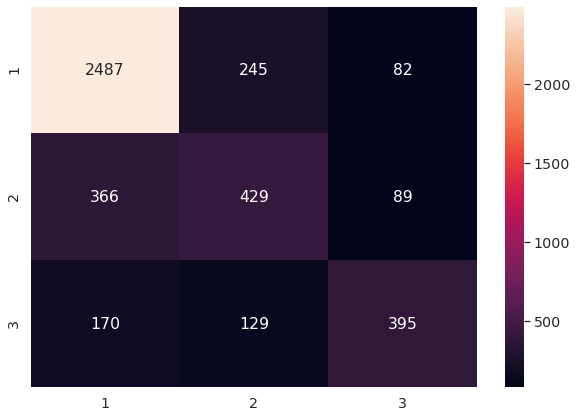

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)


df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')



- **71% accuracy**


- '1' = Negative
- '2' = Neutral
- '3' = Positive

Most of the errors are falling within the 'Neutral' predictions. Thought the 'Negative' predictions are quite accurate

## Random Forest with TfidfVectorizer

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(df['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7114071038251366


In [ ]:
result = forest.predict(X_test)

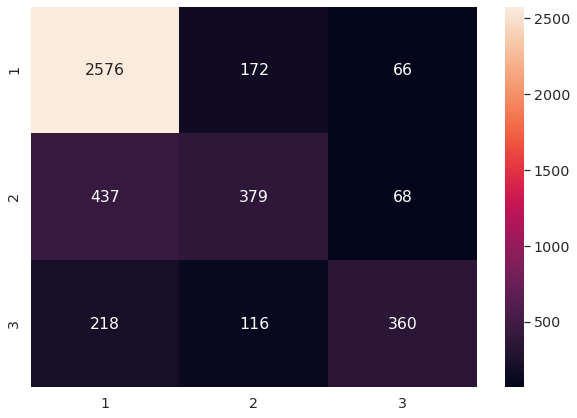

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- **71% accuracy**


- '1' = Negative
- '2' = Neutral
- '3' = Positive

Most of the errors are falling within the 'Neutral' predictions. Thought the 'Negative' predictions are quite accurate.

In both the above models it seems as thought they are getting  'Negative' confused with 'Neutral' sentiments.

## Other ML Models

In [ ]:
from nltk.corpus import stopwords

# Data cleaning and Preprocessing

Although we've already done this for the Random Forest models above, I sometimes run these separately hence why I am doing the pre-processing code again.

This process is mandatory for training any machine learning and deep learning models, and the results differs significantly without cleaning and preprocessing, as computers are not as smart as humans (so far), so we somehow need to spoon-feed them the data, and this stage is mandatory for this purpose.

Removing the stopwords, removing mentions; e.g., 
@VirginArilines, removing any links, punctuation and convert the data to lower case; for the purpose of word representation.

In [ ]:
def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    #some words might give us something important for the sentiment analysis like not, so we keep them
    wl = ["not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in wl) and len(word) > 1] 
    return " ".join(clean_words)

def remove_mentions(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'@\w+', '', input_text[i])
    return input_text

def lower_case(input_text):
    for i in range(len(input_text)):
        input_text[i] = input_text[i].lower()
    return input_text

def remove_http(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'http\S+', '',input_text[i])
    return input_text

def remove_punctuation(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'[^\w\s]','',input_text[i])
    return input_text

After applying the preprocessing on the data we need; the sentiment and the tweet itself, we will be splitting our data to training (90%) and testing (10%) after mapping the sentiment to numbers, because again the computers only understand numbers.

In [ ]:
data_2 = df[['text', 'airline_sentiment']]
preprocessed_data = data_2.apply(remove_mentions).apply(remove_http).apply(remove_punctuation).apply(lower_case)
clean_text = []
for tweet in preprocessed_data.text:
    clean = remove_stopwords(tweet)
    clean_text.append(clean)

X = clean_text
Y = preprocessed_data['airline_sentiment']
from sklearn.model_selection import train_test_split
Y = Y.map({'negative':0, 'positive':1, 'neutral':2}).astype(int)
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Word Representation

Word representation is actually a very powerful and important stage in natural language processing, and the move from one hot encoders to more efficient and meaningful word representations dramaticaly enhanced the performance of NLP models, actually in a paper published in 2019, researchers from CMU and facebook attempted to do sentence classification without training the encoders and relying only on pretrained embeddings, and it achieved pretty good results, [the paper](https://arxiv.org/abs/1901.10444). In this section, we will explore different word representation techniuqes.

Term frequency-inverse document frequency (TF-IDF) has emerged to be a powerful word representation technique until today, [this blog explains it brilliantly](https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_features_train = vectorizer.fit_transform(X_train)
text_features_test = vectorizer.transform(X_test)

Another breakthrough in the field of NLP is [Word2vec](https://arxiv.org/abs/1301.3781), proposed by google. It gives word representation based on the context of the word. On the other hand, it has some limitations like the out of vocab, but since we are using a small dataset, it will not be an issue now.
The following code train a word2vec model on our data, and you can also [download pretrained](https://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/) word2vec embeddings for many languages.

In [ ]:
from gensim.models import Word2Vec
sentences = [line.split() for line in clean_text]
w2v = Word2Vec(sentences, size=50, min_count = 0, window = 5,workers=4,iter=500)

visualization of what word2vec actually learn, you can notice that words that are similar are actually close in the space.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


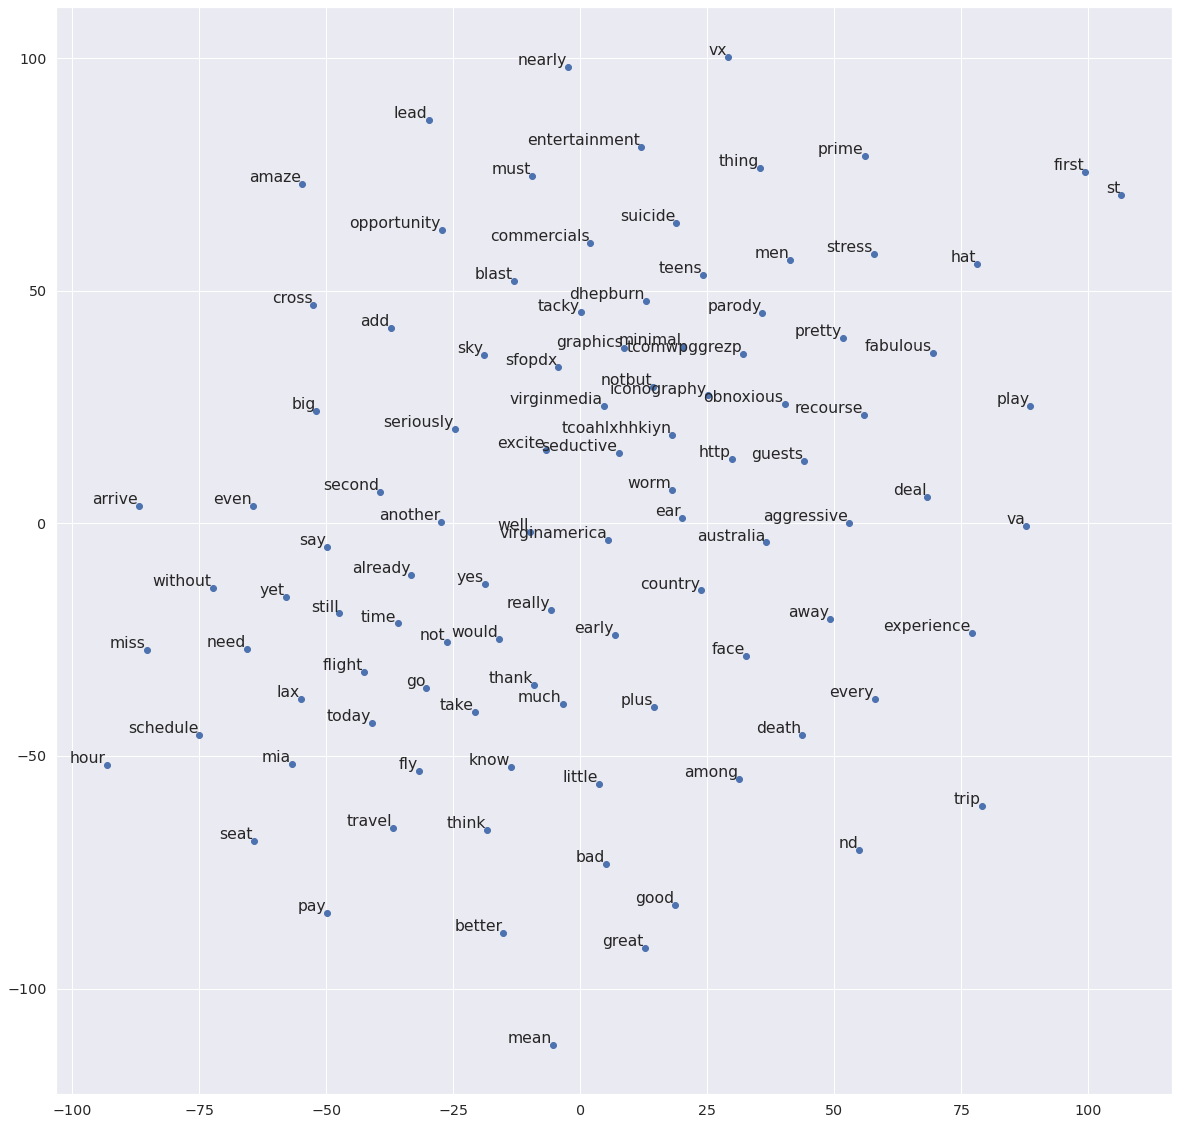

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = w2v[w2v.wv.vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[0:100])
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
labels = list(w2v.wv.vocab.keys())
for label, x, y in zip(labels, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-1, -1),
        textcoords='offset points', ha='right', va='bottom')

plt.show()

For deep learning techniques, every word should be replaced by a token, and stored in a dictionary that holds for every word its embeddings.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


t = Tokenizer()
t.fit_on_texts(clean_text)
vocab_size = len(t.word_index) + 1
encoded_docs = t.texts_to_sequences(clean_text)
padded_docs = pad_sequences(encoded_docs, maxlen=20, padding='post')
embedding_dict = dict()
for i in w2v.wv.vocab:
    embedding_dict[i] = w2v[i]

embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


After word2vec, companies and universities entered a competetion in the field of word embeddings, facebook proposed fastText that overcomes the issue of out of vocabulary, while Samsung with the University of edingburgh proposed Byte Per Encoding (BPE), and recently, researchers made another breakthrough my proposing contexual word embeddings (this was also a limitation in word2vec that it does not take into consideration that words may have multiple meanings) by proposing Elmo.

# Other Machine Learning Techniques with TfidfVectorizer

Machine Learning techniques perform very well as classifiers. In fact, they usually surpass deep learning techniques when the training set is relatively small. In this section we will be exploring some of these techniques. We will be using sklearn to implement these techniques. Also, for machine learning techniques, we will use TF-IDF as word representation.

In [ ]:
def logistic_regression(training_features, labels_train, test_features, labels_test):
    for c in [0.01, 0.05, 0.25, 0.5, 1, 5]:
    #changing the parameter C to get the optimal classification
        lr = LogisticRegression(C=c)
        lr.fit(training_features, labels_train)
        print ("Accuracy of logistic regression for C=%s: %s" 
           % (c, accuracy_score(labels_test, lr.predict(test_features))))
        results(labels_test, lr.predict(test_features))
    
  
def svm(training_features, labels_train, test_features, labels_test):
    for c in [1, 5, 10, 50]:
    #changing the parameter C to get the optimal classification
        model = LinearSVC(C=c)
        model.fit(training_features, labels_train)
        print ("Accuracy of svm for C=%s: %s" 
           % (c, accuracy_score(labels_train, model.predict(training_features))))
        results(labels_test, model.predict(test_features))
    
def naiive_bayes(training_features, labels_train, test_features, labels_test):
    clf = MultinomialNB()
    clf.fit(training_features, labels_train)
    print ("Accuracy of Naiive Bayes: %s" 
         % ( accuracy_score(labels_test, clf.predict(test_features))))
    results(labels_test, clf.predict(test_features))

def GB(training_features, labels_train, test_features, labels_test):
    model = GradientBoostingClassifier()
    model.fit(training_features,y_train)
    print ("Accuracy of GBM: %s" 
          % (accuracy_score(y_test, model.predict(test_features))))
    results(y_test, model.predict(test_features))
        
def RF(training_features, labels_train, test_features, labels_test):
    model = RandomForestClassifier(n_estimators=200)
    model.fit(training_features,y_train)
    print ("Accuracy of Random Forest for: %s" 
          % (accuracy_score(y_test, model.predict(test_features))))
    results(y_test, model.predict(test_features))

In order to get better insights on the results, we will calculate the confusion matrix, accuracy, precision, recall and F1 score for each classifier

In [ ]:
def results(labels, pred):
    conf_mat = confusion_matrix(labels,pred)
    df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    print(conf_mat)
    print(classification_report(labels,pred))  
    print(accuracy_score(labels, pred))

**Logistic Regression**

To start with, Logistic regression is a simple classification techniuqe but yet powerful in sometimes, for multiclass classification, it uses the ONe-VS-rest technique. The C parameter is varied in order to get the best result.

Accuracy of logistic regression for C=0.01: 0.6475409836065574
[[924   0   0]
 [215  23   0]
 [299   2   1]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       924
           1       0.92      0.10      0.17       238
           2       1.00      0.00      0.01       302

    accuracy                           0.65      1464
   macro avg       0.85      0.37      0.32      1464
weighted avg       0.76      0.65      0.52      1464

0.6475409836065574
Accuracy of logistic regression for C=0.05: 0.7090163934426229
[[914   4   6]
 [144  80  14]
 [246  12  44]]
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       924
           1       0.83      0.34      0.48       238
           2       0.69      0.15      0.24       302

    accuracy                           0.71      1464
   macro avg       0.74      0.49      0.51      1464
weighted avg       0.72      0.71      0.65      1464

0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression for C=1: 0.7971311475409836
[[859  20  45]
 [ 50 153  35]
 [121  26 155]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       924
           1       0.77      0.64      0.70       238
           2       0.66      0.51      0.58       302

    accuracy                           0.80      1464
   macro avg       0.75      0.70      0.72      1464
weighted avg       0.79      0.80      0.79      1464

0.7971311475409836


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression for C=5: 0.7903005464480874
[[836  26  62]
 [ 37 168  33]
 [115  34 153]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       924
           1       0.74      0.71      0.72       238
           2       0.62      0.51      0.56       302

    accuracy                           0.79      1464
   macro avg       0.73      0.71      0.72      1464
weighted avg       0.78      0.79      0.78      1464

0.7903005464480874


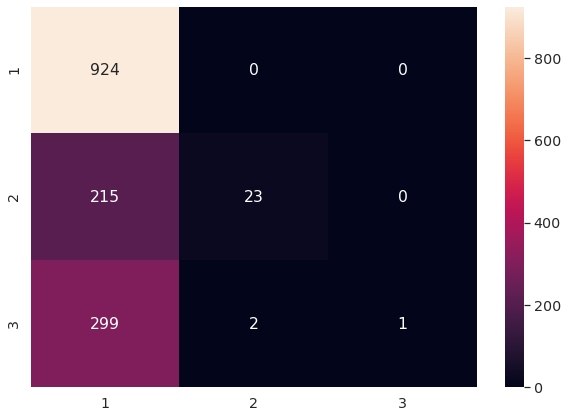

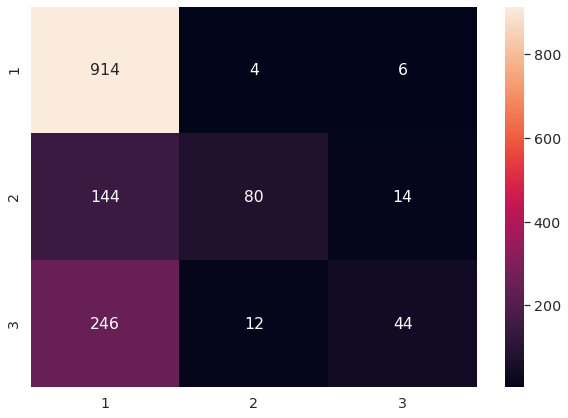

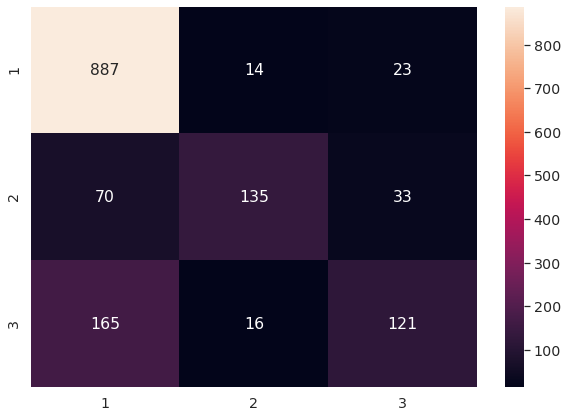

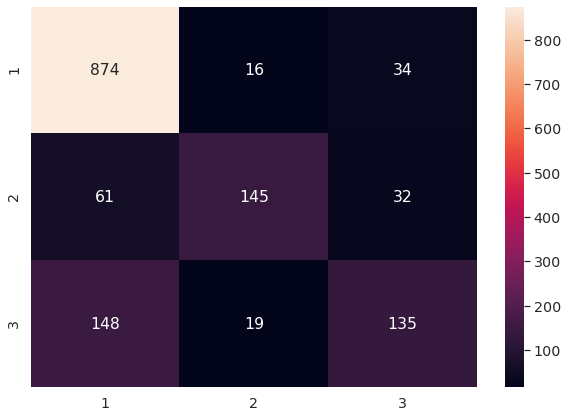

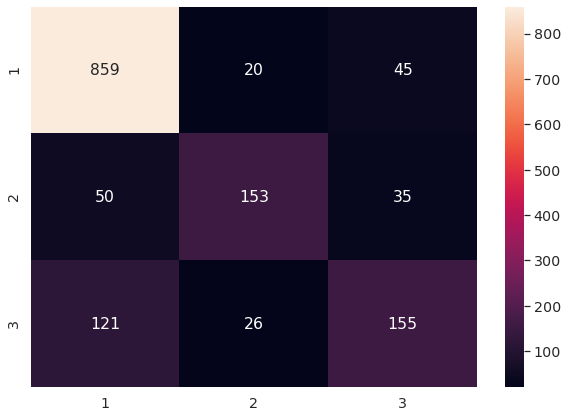

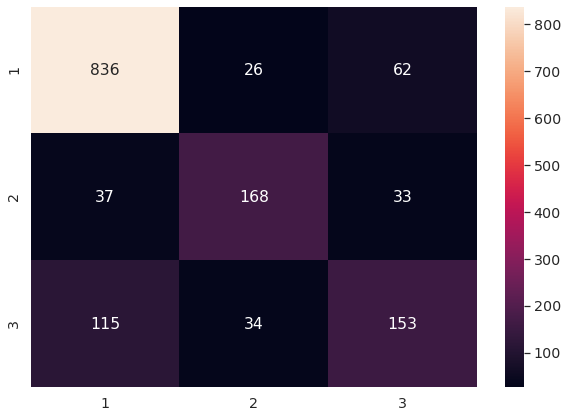

In [ ]:
logistic_regression(text_features_train,y_train, text_features_test,y_test)

**Support Vector Machines**

Support Vector machines is a very popular technique for classification, it simply tries to find the line (vector) that best seperates the classes. Also, the C parameter is varied to get the best results.

Accuracy of svm for C=1: 0.9436095931997571
[[840  22  62]
 [ 38 169  31]
 [117  36 149]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       924
           1       0.74      0.71      0.73       238
           2       0.62      0.49      0.55       302

    accuracy                           0.79      1464
   macro avg       0.73      0.70      0.72      1464
weighted avg       0.78      0.79      0.78      1464

0.7909836065573771
Accuracy of svm for C=5: 0.9641013964784456
[[818  30  76]
 [ 40 166  32]
 [118  41 143]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       924
           1       0.70      0.70      0.70       238
           2       0.57      0.47      0.52       302

    accuracy                           0.77      1464
   macro avg       0.70      0.69      0.69      1464
weighted avg       0.76      0.77      0.76      1464

0.769808743169399
Accuracy of svm for C

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy of svm for C=50: 0.9757134183363692
[[785  36 103]
 [ 45 153  40]
 [111  44 147]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       924
           1       0.66      0.64      0.65       238
           2       0.51      0.49      0.50       302

    accuracy                           0.74      1464
   macro avg       0.67      0.66      0.66      1464
weighted avg       0.74      0.74      0.74      1464

0.7411202185792349


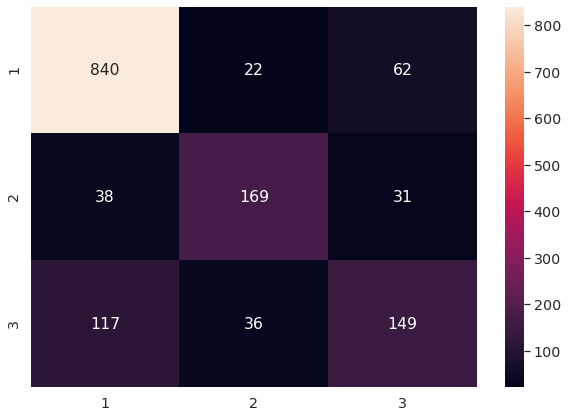

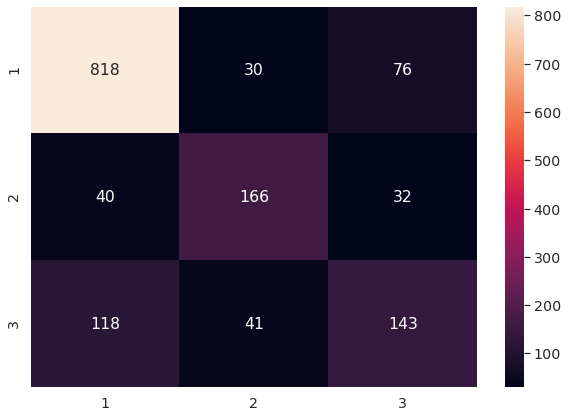

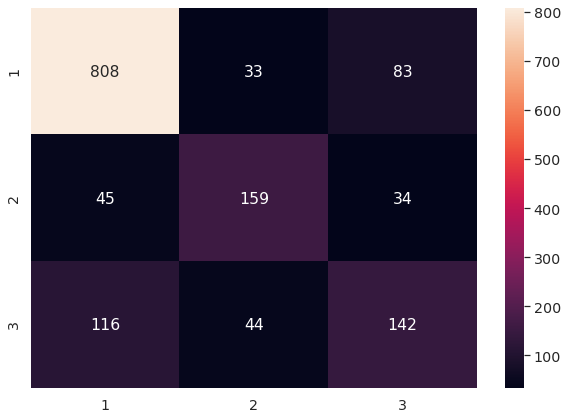

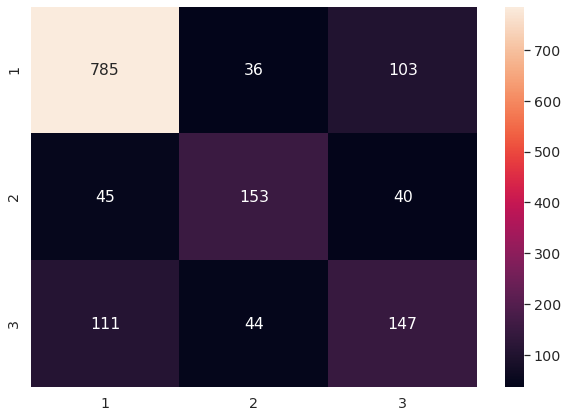

In [ ]:
svm(text_features_train,y_train, text_features_test,y_test)

**Naiive Bayes**

Naiive Bayes technique is totally dependant on Bayes theorem of probability for classification. It has its advantages and disadvantages; such as it is simple, fast, and has low computation cost and can work on large datasets, but on the other hand, the assumption of independent features is a drawback as in practice it is almost impossible that model will get a set of predictors which are entirely independent.

Accuracy of Naiive Bayes: 0.6857923497267759
[[918   0   6]
 [186  44   8]
 [256   4  42]]
              precision    recall  f1-score   support

           0       0.68      0.99      0.80       924
           1       0.92      0.18      0.31       238
           2       0.75      0.14      0.23       302

    accuracy                           0.69      1464
   macro avg       0.78      0.44      0.45      1464
weighted avg       0.73      0.69      0.61      1464

0.6857923497267759


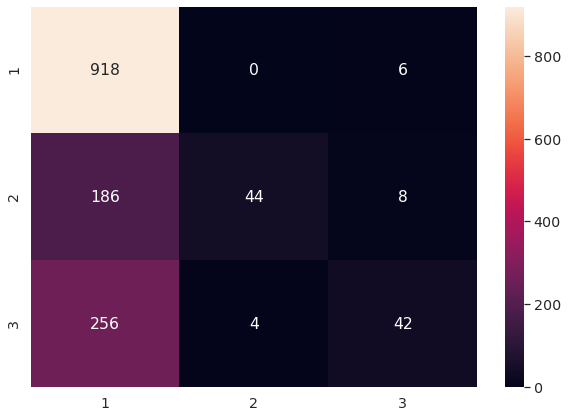

In [ ]:
naiive_bayes(text_features_train,y_train, text_features_test,y_test)

**Gradient Boosting algorithm**

Gradient Boosting is a type of ensemble models, it is fast, accurate and the algorithm is parallelizable. It combines a set of weak learners and delivers improved prediction accuracy.

Accuracy of GBM: 0.7547814207650273
[[872  22  30]
 [ 67 147  24]
 [193  23  86]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       924
           1       0.77      0.62      0.68       238
           2       0.61      0.28      0.39       302

    accuracy                           0.75      1464
   macro avg       0.72      0.62      0.64      1464
weighted avg       0.74      0.75      0.73      1464

0.7547814207650273


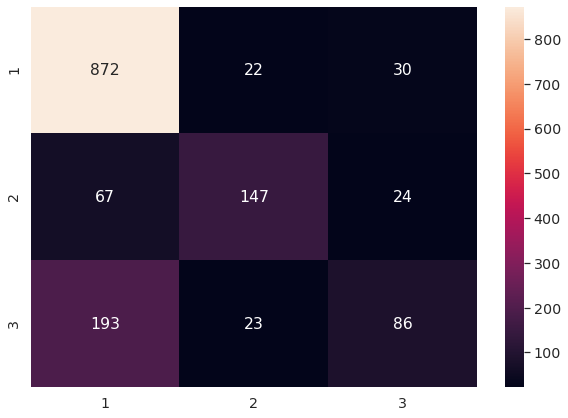

In [ ]:
GB(text_features_train,y_train, text_features_test,y_test)

**Random Forest**

Random forest depends mainly on decision trees for prediction, it is accurate and robust and rarely overfits, but it is slow as it has so many decisions to make for prediction.

Accuracy of Random Forest for: 0.7773224043715847
[[875  13  36]
 [ 73 135  30]
 [151  23 128]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       924
           1       0.79      0.57      0.66       238
           2       0.66      0.42      0.52       302

    accuracy                           0.78      1464
   macro avg       0.75      0.65      0.68      1464
weighted avg       0.77      0.78      0.76      1464

0.7773224043715847


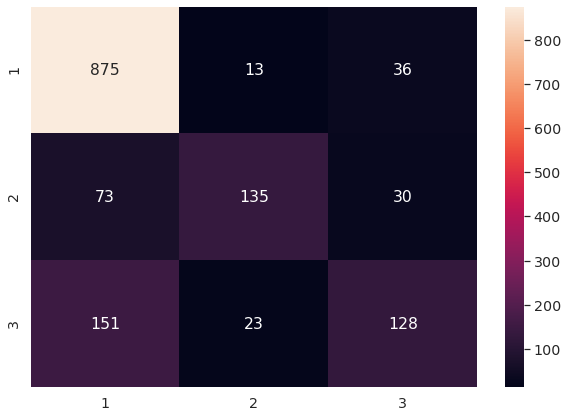

In [ ]:
RF(text_features_train,y_train, text_features_test,y_test)

# Deep Learning techniques

This section was made possible by the great efforts of Geoffry Hinton, the man who came up with back porbagation; how neural networks actually learn. In this section, we will explore the feed forward neural network, Long Short Term Memory (LSTM), and convolutional Neural Networks (CNN) for text classification. For Deep Learning, the embeddings extracted by word2vec will be used.

At first, the labels should be in the form of one hot encoders.

In [ ]:
import tensorflow as tf
y_one_hot = tf.keras.utils.to_categorical(
    Y,
    num_classes=3,
    dtype='int32'
)

In [ ]:
x_train_DL, x_test_DL,y_train_DL,y_test_DL = train_test_split(padded_docs,y_one_hot,test_size=0.1,random_state=42)

**Feed Forward Neural Networks**

Feed Forward neural networks can perform solid classifications given moderate amount of data. In this model, we will use the trained word2vec embeddings as the initialized embeddings for the first layer, followed by two dense layers each containing 128 hidden nodes, in addition to dropout to reduce the effect of overfitting. finally, softmax actiavtion is used to predict the most probable output.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            603200    
_________________________________________________________________
dense (Dense)                (None, 20, 128)           6528      
_________________________________________________________________
dropout (Dropout)            (None, 20, 128)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 20, 128)           16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 7

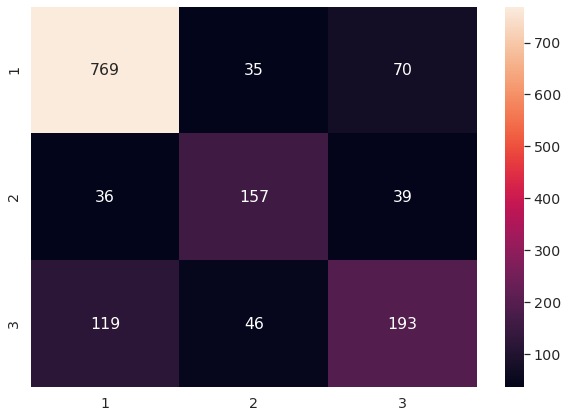

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,LSTM, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from sklearn.metrics import accuracy_score
model = Sequential()
embedding_layer = Embedding(vocab_size,50,embeddings_initializer = Constant(embedding_matrix),input_length=20, trainable=False)
model.add(embedding_layer)
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
model.fit(x_train_DL,y_train_DL,epochs = 50, batch_size=128)
ans = model.predict(x_test_DL)
labels = [np.where(r==1)[0][0] for r in y_test_DL]
ans = np.argmax(ans,axis=1)
accuracy_score(ans,labels)
results(ans,labels)

**Long Short Term Memory (LSTM)**

Humans don’t start their thinking from scratch every second. As you read this sentence, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence. However, feed forward neural networks are not able to do this, which raised the need for recurrent neural network, but they still suffered from the vanishing gradients problem, which in turn led researchers to propose Gated recurrent Unit (GRU) and LSTM, which are better at caputring the meaning of a whole sequence. Until now in this paragraph, LSTM's sound like a great fit for NLP problems, which they really are. In this section we will explore them for this task.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            603200    
_________________________________________________________________
lstm (LSTM)                  (None, 20, 32)            10624     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 622,243
Trainable params: 622,243
Non-trainable params: 0
________________________________________________

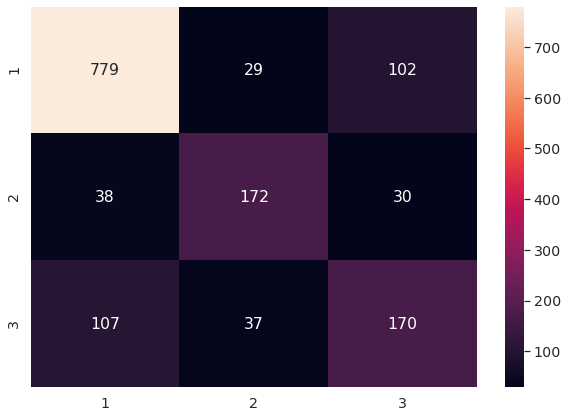

In [ ]:
model = Sequential() 
embedding_layer = Embedding(vocab_size,50,embeddings_initializer = Constant(embedding_matrix),input_length=20, trainable=True)
model.add(embedding_layer)
model.add(LSTM(32, activation = 'relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation = 'softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train_DL,y_train_DL,epochs = 20,batch_size=256)
ans = model.predict(x_test_DL)
labels = [np.where(r==1)[0][0] for r in y_test_DL]
ans = np.argmax(ans,axis=1)
accuracy_score(ans,labels)
results(ans,labels)

**Convolutional Neural Networks (CNN)**

CNN are well known in the tasks of image processing, but they also perform pretty good in the field of NLP. In fact, in machine translation, facebook proposed CNN, and it is considered one of the state of the art architectures, as they achieved high results on all the bench marks and actually they are leading in some languages. Also, they are well known for their ability of parallel computation. In this section, we will explore the ability of CNN for this task, the used filters are 1D, this blog explains how text classification with CNN works.

https://stackoverflow.com/questions/58168843/typeerror-init-missing-1-required-positional-argument-kernel-size

Epoch 1/20
412/412 [==============================] - 31s 3ms/step - loss: 0.9271 - accuracy: 0.6046
Epoch 2/20
412/412 [==============================] - 1s 3ms/step - loss: 0.6913 - accuracy: 0.7113
Epoch 3/20
412/412 [==============================] - 1s 3ms/step - loss: 0.6112 - accuracy: 0.7518
Epoch 4/20
412/412 [==============================] - 1s 3ms/step - loss: 0.5873 - accuracy: 0.7588
Epoch 5/20
412/412 [==============================] - 1s 3ms/step - loss: 0.5775 - accuracy: 0.7647
Epoch 6/20
412/412 [==============================] - 1s 3ms/step - loss: 0.5588 - accuracy: 0.7743
Epoch 7/20
412/412 [==============================] - 1s 3ms/step - loss: 0.5416 - accuracy: 0.7818
Epoch 8/20
412/412 [==============================] - 1s 3ms/step - loss: 0.5428 - accuracy: 0.7806
Epoch 9/20
412/412 [==============================] - 1s 3ms/step - loss: 0.5557 - accuracy: 0.7713
Epoch 10/20
412/412 [==============================] - 1s 3ms/step - loss: 0.5339 - accuracy: 0.783

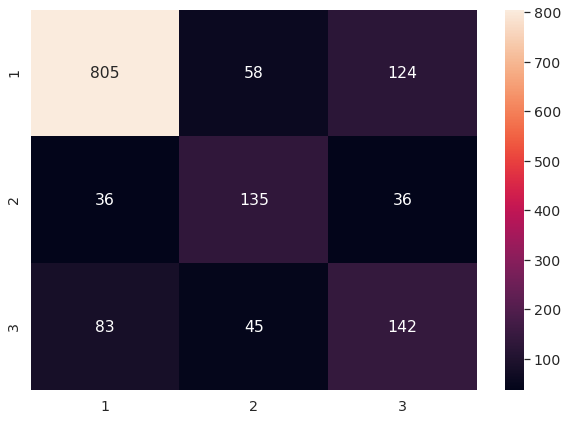

In [ ]:
from keras.layers import Convolution1D, GlobalMaxPooling1D
from keras.layers import Dropout
model = Sequential()
embedding_layer = Embedding(vocab_size,50,embeddings_initializer = Constant(embedding_matrix),input_length=20, trainable=False)
model.add(embedding_layer)
# model.add(Convolution1D(nb_filter=100,
#                         filter_length=5,
#                         kernel_size = 3,
#                         border_mode='valid',
#                         activation='relu',
#                         subsample_length=1))

model.add(Convolution1D(6,3,3,input_shape=(256,768,1),activation='relu'))

model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train_DL,y_train_DL,epochs=20)
ans = model.predict(x_test_DL)
labels = [np.where(r==1)[0][0] for r in y_test_DL]
ans = np.argmax(ans,axis=1)
accuracy_score(ans,labels)
results(ans,labels)

# Results Summary, Discussion and Error Analysis

Eight machine learning and deep learning techniques were implemented for the task of sentiment analysis for tweets for 6 US airlines. The training data is 13.1k while the testing data 1.4k.

The machine learning techniques implemented were; Logistic regression, Support Vector Machines (SVM), Naiive Bayes, Gradient Boosting and Random Forest. Tf-IDF was utilized as a word representation for The reported results for best model of each technique are shown in the table below.

**Results Summary, Discussion and Error Analysis**

Ten machine learning and deep learning techniques were implemented for the task of sentiment analysis for tweets for 6 US airlines. The training data for 
**Random Forest with CountVectorizer** and **Random Forest with TfidfVectorizer** was 70% (102,648 rows) and testing data was 30% (43,992 rows)

While for the rest of the machine learning techniques implemented were 90% training data (13.1k) and 10% testing data (1.4k). 
- Logistic regression
- Support Vector Machines (SVM)
- Naiive Bayes
- Gradient Boosting 

Tf-IDF was utilized as a word representation for the reported results for best model of each technique are shown in the table below.

| Technique  | Accuracy | Precision | Recall | F1Score|
| ---------- | -------- |-------- |-------- |-------- |
| Random Forest with CountVectorizer| 0.71%  |  | -- | -- |
| Random Forest with TfidfVectorizer| 0.71%  | -- | -- | -- |
| Logistic Regression  | 0.79 | 0.79 | 0.80 | 0.79|
| Support Vector Machines  | 0.97 | 0.74 | 0.74 | 0.74 |
| Naive Bayes  | 0.68 | 0.73 | 0.69 | 0.61 |
| Gradient Boosting | 0.75 | 0.74 | 0.75 | 0.73 |
| Random Forest | 0.77  | 0.76 | 0.78 | 0.76 |

For further analysis, confusion matrix is useful to gain some insights on the results.

Random Forest with CountVectorizer

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 2495 | 243 | 76 |
| positive  | 342 | 458 | 84 |
| neutral  | 186 | 122 | 386 |

Random Forest with TfidfVectorizer

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 864 | 18 | 57 |
| positive  | 436 | 392 | 56|
| neutral  | 224 | 122 | 348 |

Logistic regression

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 914 | 4 | 6 |
| positive  | 144 | 80 | 14 |
| neutral  | 246 | 12 | 44 |

Support Vector Machines

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 840 | 22 | 62 |
| positive  | 38 | 169 | 31 |
| neutral  | 117 | 36 | 149 |

Naiive Bayes

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 918 | 0 | 6 |
| positive  | 186 | 44 | 8 |
| neutral  | 256 | 4 | 42 |

Gradient Boosting

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 872 | 23 | 29 |
| positive  | 69 | 146 | 23 |
| neutral  | 192 | 23 | 87 |




The implemented deep learning techniques were; feed forward neural network, LSTM model and CNN model. Word2vec embeddings were used for these techniques.

The reported results for each technique are shown in the table below.

| Technique  | Accuracy | Precision | Recall | F1Score|
| ---------- | -------- |-------- |-------- |-------- |
| Feed Forward | 0.77 | 0.78 | 0.78 | 0.78 |
| LSTM  | 0.78 | 0.78 | 0.78 | 0.78 |
| CNN  | 0.75  | 0.78 | 0.75 | 0.76 |

Confusion Matrix

Feed Forward Neural Network

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 812 | 33 | 101 |
| positive  | 29 | 163 | 38|
| neutral  | 83 | 42 | 163 |

Long Short Term Memory (LSTM)

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 800 | 34 | 90 |
| positive  | 38  | 171 | 41 |
| neutral  | 86 | 33 | 171 |

Convolutional Neural Networks (CNN)

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 827 | 65 | 130 |
| positive  | 38 | 141 | 40 |
| neutral  | 59 | 32 | 132 |


SVM seems to be the clear winner with 97% accuracy.

It makes sense, because the SVM uses hyperplanes in a high- or infinite-dimensional space, which can be used for classification. 

SVM's unique selling point is that it can deal with many higher dimensions by using a hyperplane - so comes in very handy for dealing with large and ubiquitous data, or words in this case, that cannot be easily visualised/expressed in a linear fashion. 

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. 

## Error Analysis

- The accuracy of all the implemented techniques were better at classifying the negative type of reviews, which is due to the fact that the training data has more negative reviews than neutral or positive reviews.

- The highest error rate is in the neutral class, especially in the ML techniques, where the accuracy of classifying the neutral class was around 50%, deep learning models were better at classifying neutral classes.

- The classifiers were much better in classifying sentences which consists of obvious words indicating any sentiment, such as; good, bad, awesome, terrible and the list goes on.

- The performance of the models on small sentences was better overall than the long ones, however, Deep learning techniques were better at classifying long sentences than ML algorithms.

- Machine learning techniques; especially logistic regression and SVM performed at the same level as deep learning techniques, due to the fact the dataset is considered small, and deep learning techniques have more trainable and learnable parameters and hence more data is required to give better performance.

- The problem of overfitting appears more in Deep learning techniques than machine learning techniques.

- Deep learning handles errors in training set better than machine learning.

- Deep learning models needs more tuning as they have more parameters to vary and tune.

- Deep learning models were better at handling words that can vary in meaning depending on the context, especially LSTM models (sequential), such as; blow my mind, blow up.

- Padding sequences negatively effects the learning of DL models.



## Further Model Exploration

**Trying Bert for sentence classification.**

Transformers represent the current state of the art NLP models in order to analyse text data. Some examples of widely known Transformers models are BERT and GTP2.

Before the creation of Transformers, Recurrent Neural Networks (RNNs) represented the most efficient way to analyse sequentially text data for prediction but this approach found quite difficult to reliably make use of long term dependencies (eg. our network might find difficult to understand if a word fed in several iterations ago might result to be useful for the current iteration).

Transformers successfully managed to overcome this limitation thanks to a mechanism called Attention (which is used in order to determine which parts of the text to focus on and give more weight). Additionally, Transformers made easier to process text data in parallel rather than sequentially (therefore improving execution speed).

**Replacing word2vec with Elmo/ FastText** which can handle context and subwords respectively.

Optimize and fine-tune the deep learning techniques.

## **references:**

https://arxiv.org/abs/1901.10444

https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/

https://github.com/Bhavin789/Twitter-Airline-Sentiment-Analysis/blob/master/Air%20Line%20Twitter%20Sentiment%20Analysis.ipynb

https://www.kaggle.com/parthsharma5795/comprehensive-twitter-airline-sentiment-analysis

https://www.kaggle.com/muhizatar/twitter-us-airlines-sentiment-analysis/

https://towardsdatascience.com/roadmap-to-natural-language-processing-nlp-38a81dcff3a6

Great Learning: Lecture codes
